In [26]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.optimizers import RMSprop

In [27]:
img = image.load_img("C:\\Users\\aiden\Downloads\\archive\\fresh_banana\\rotated_by_15_Screen Shot 2018-06-12 at 9.38.10 PM.png")

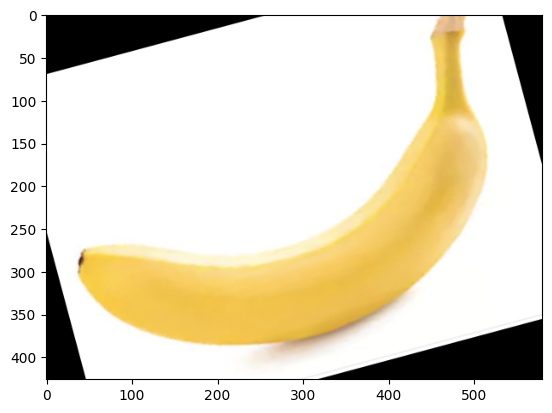

In [28]:
plt.imshow(img)

In [29]:
cv2.imread("C:\\Users\\aiden\Downloads\\archive\\fresh_banana\\rotated_by_15_Screen Shot 2018-06-12 at 9.38.10 PM.png").shape

(426, 580, 3)

In [30]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [39]:
train_dataset = train.flow_from_directory("C:\\Users\\aiden\\Downloads\\archive\\train\\",
                                            target_size=(200,200),
                                            batch_size=3,
                                            color_mode='rgb',
                                            class_mode='binary')

validation_dataset = train.flow_from_directory("C:\\Users\\aiden\\Downloads\\archive\\validate\\",
                                            target_size=(200,200),
                                            batch_size=3,
                                            color_mode='rgb',
                                            class_mode='binary')

Found 2585 images belonging to 2 classes.


Found 1011 images belonging to 2 classes.


In [32]:
train_dataset.class_indices

{'fresh': 0, 'rotten': 1}

In [33]:
train_dataset.classes

array([0, 0, 0, ..., 1, 1, 1])

In [34]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    ##
                                    tf.keras.layers.Dense(128,activation='relu'),
                                    ##
                                    tf.keras.layers.Dense(1,activation='sigmoid')
                                    ])


In [35]:
model.compile(loss='binary_crossentropy',
                optimizer=RMSprop(learning_rate=0.001),
                metrics=['accuracy'])

In [36]:
model_fit = model.fit(train_dataset,
                        epochs=15,
                        steps_per_epoch=150,
                        validation_data=validation_dataset)

Epoch 1/15
150/150 [==============================] - 126s 835ms/step - loss: 0.7569 - accuracy: 0.6622 - val_loss: 0.2357 - val_accuracy: 0.8961
Epoch 2/15
150/150 [==============================] - 125s 832ms/step - loss: 0.5447 - accuracy: 0.9310 - val_loss: 0.0409 - val_accuracy: 0.9921
Epoch 3/15
150/150 [==============================] - 124s 829ms/step - loss: 0.3659 - accuracy: 0.9555 - val_loss: 0.0283 - val_accuracy: 0.9931
Epoch 4/15
150/150 [==============================] - 124s 827ms/step - loss: 0.3424 - accuracy: 0.9465 - val_loss: 0.2456 - val_accuracy: 0.8892
Epoch 5/15
150/150 [==============================] - 124s 826ms/step - loss: 0.2779 - accuracy: 0.9556 - val_loss: 0.0382 - val_accuracy: 0.9901
Epoch 6/15
150/150 [==============================] - 124s 830ms/step - loss: 0.1552 - accuracy: 0.9733 - val_loss: 0.1683 - val_accuracy: 0.9654
Epoch 7/15
150/150 [==============================] - 123s 823ms/step - loss: 0.2676 - accuracy: 0.9443 - val_loss: 0.1292 -

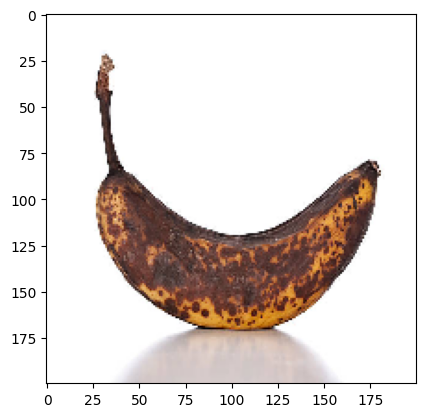

1/1 [==============================] - 0s 141ms/step
{'fresh': 0, 'rotten': 1}
[[1.]]
Rotten


In [37]:
testImg = image.load_img("Rotten Banana.jpg", target_size=(200,200))
plt.imshow(testImg)
plt.show()

X = image.img_to_array(testImg)
X = np.expand_dims(X,axis=0)
images = np.vstack([X])

val = model.predict(images)

print(train_dataset.class_indices)
print(val)

if val == 0:
    print("Fresh")
else:
    print("Rotten")

1/1 [==============================] - 0s 70ms/step
[[1.]]


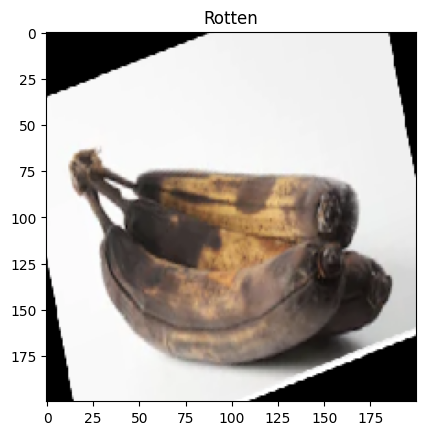

1/1 [==============================] - 0s 70ms/step
[[1.]]


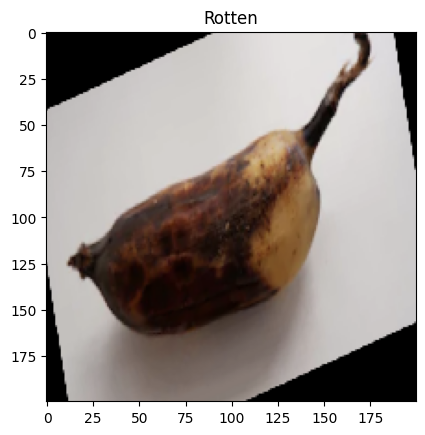

1/1 [==============================] - 0s 71ms/step
[[1.]]


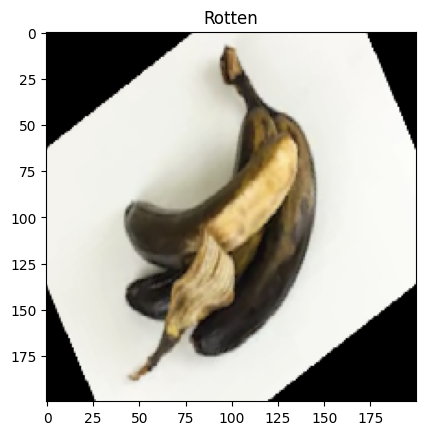

1/1 [==============================] - 0s 68ms/step
[[0.]]


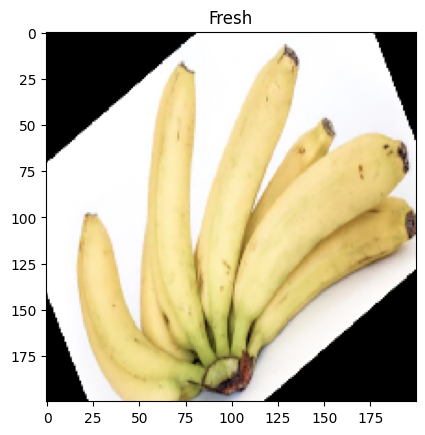

1/1 [==============================] - 0s 68ms/step
[[1.]]


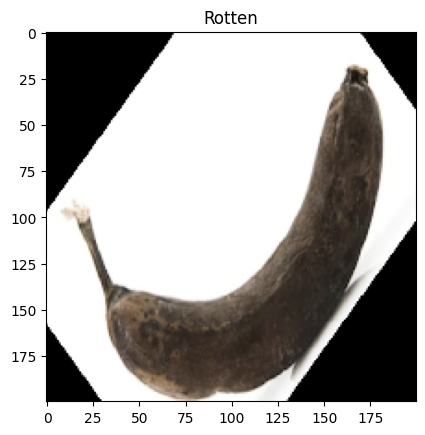

1/1 [==============================] - 0s 68ms/step
[[0.9997881]]


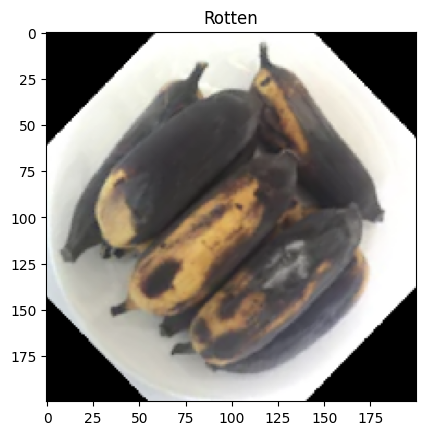

1/1 [==============================] - 0s 70ms/step
[[0.]]


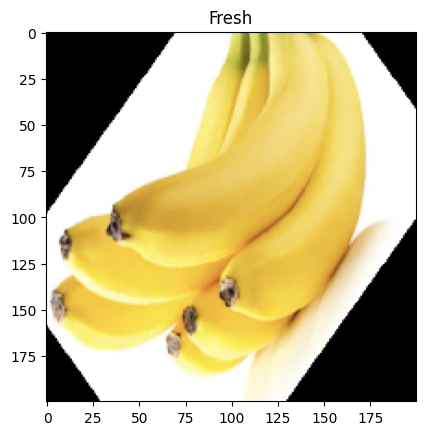

1/1 [==============================] - 0s 69ms/step
[[1.]]


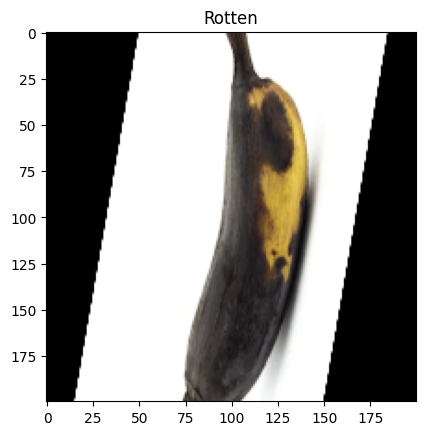

1/1 [==============================] - 0s 76ms/step
[[0.]]


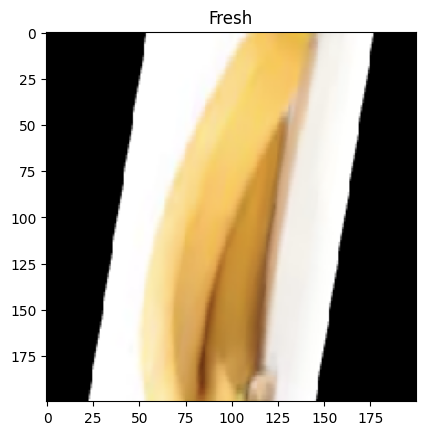

1/1 [==============================] - 0s 78ms/step
[[0.]]


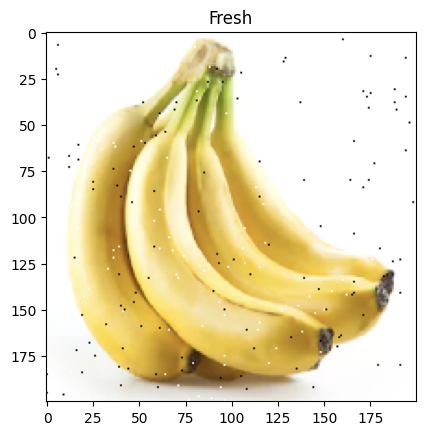

1/1 [==============================] - 0s 69ms/step
[[0.]]


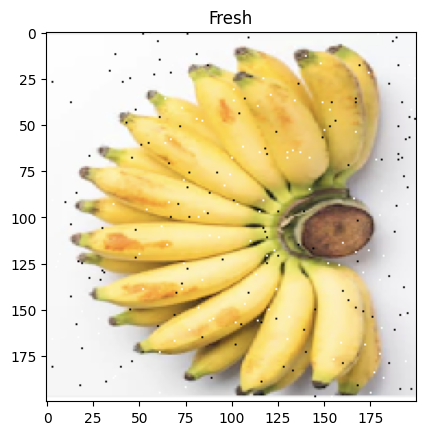

1/1 [==============================] - 0s 76ms/step
[[1.]]


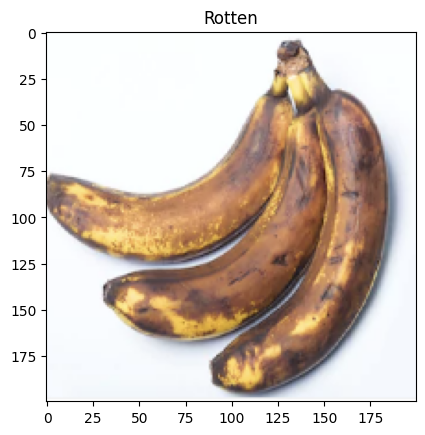

1/1 [==============================] - 0s 68ms/step
[[0.]]


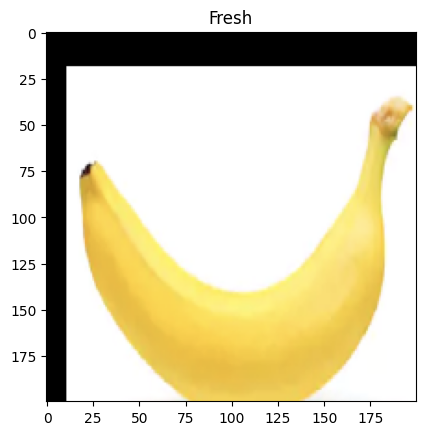

1/1 [==============================] - 0s 79ms/step
[[0.]]


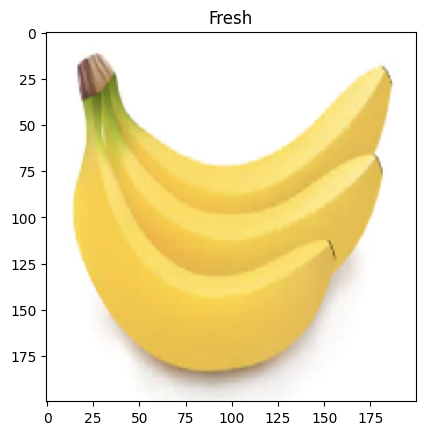

In [38]:
path = "C:\\Users\\aiden\\Downloads\\archive\\test\\"

for i in os.listdir(path):
    img = image.load_img(path + i, target_size=(200,200))
    plt.imshow(img)

    X = image.img_to_array(img)
    X = np.expand_dims(X,axis=0)
    images = np.vstack([X])

    val = model.predict(images)

    if val == 0:
        plt.title("Fresh")
    else:
        plt.title("Rotten")
    
    print(val)
    plt.show()